In [55]:
!pip install pandas numpy scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import pandas as pd
import numpy as np


In [57]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


In [58]:
deliveries.head()
matches.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [59]:
deliveries.shape
matches.shape
deliveries.columns
matches.columns


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [60]:
deliveries.info()
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [61]:
print(deliveries.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [62]:
deliveries.isna().sum()
matches.isna().sum()


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [63]:
deliveries = deliveries.drop_duplicates()
matches = matches.drop_duplicates()


In [64]:
matches['winner'] = matches['winner'].fillna('NO RESULT')


In [65]:
matches['city'] = matches['city'].fillna('UNKNOWN')
matches['venue'] = matches['venue'].fillna('UNKNOWN')


In [66]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('NOT OUT')
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('NONE')
deliveries['fielder'] = deliveries['fielder'].fillna('NONE')


In [67]:
matches['date'] = pd.to_datetime(matches['date'])
matches['year'] = matches['date'].dt.year


In [68]:
def clean_text(col):
    return (
        col.astype(str)
           .str.strip()
           .str.replace(r'\s+', ' ', regex=True)
           .str.upper()
    )

deliveries['batter'] = clean_text(deliveries['batter'])
deliveries['bowler'] = clean_text(deliveries['bowler'])
deliveries['non_striker'] = clean_text(deliveries['non_striker'])


matches['team1'] = clean_text(matches['team1'])
matches['team2'] = clean_text(matches['team2'])
matches['winner'] = clean_text(matches['winner'])


In [69]:
deliveries['player_dismissed'] = (
    deliveries['player_dismissed']
    .fillna('NOT OUT')
    .astype(str)
    .str.upper()
)

deliveries['dismissal_kind'] = (
    deliveries['dismissal_kind']
    .fillna('NONE')
    .astype(str)
    .str.upper()
)

deliveries['fielder'] = (
    deliveries['fielder']
    .fillna('NONE')
    .astype(str)
    .str.upper()
)


In [70]:
deliveries['is_wicket'] = deliveries['dismissal_kind'].apply(
    lambda x: 0 if x == 'NONE' else 1
)



In [71]:
matches['player_of_match'] = matches['player_of_match'].fillna('NO AWARD')


In [72]:
matches['result_margin'] = matches['result_margin'].fillna(0)


In [73]:
matches['target_runs'] = matches['target_runs'].fillna(0)


In [74]:
matches['target_overs'] = matches['target_overs'].fillna(0)


In [75]:
matches['method'] = matches['method'].fillna('NORMAL')


In [76]:
deliveries.isna().sum()
matches.isna().sum()



id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
year               0
dtype: int64

In [77]:
text_cols = [
    'city','venue','team1','team2','toss_winner',
    'winner','result','method','player_of_match'
]

for col in text_cols:
    matches[col] = (
        matches[col]
        .astype(str)
        .str.strip()
        .str.upper()
    )


In [78]:
deliveries['extras_type'] = deliveries['extras_type'].fillna('NONE')


In [79]:
deliveries.isna().sum()


match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [80]:
deliveries.to_csv("deliveries_cleaned.csv", index=False)
matches.to_csv("matches_cleaned.csv", index=False)


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
deliveries = pd.read_csv("deliveries_cleaned.csv")
matches = pd.read_csv("matches_cleaned.csv")


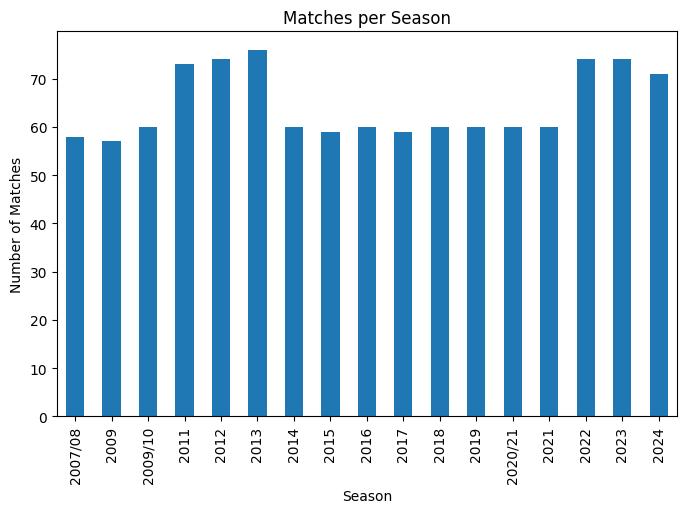

In [83]:
plt.figure(figsize=(8,5))
matches['season'].value_counts().sort_index().plot(kind='bar')
plt.title("Matches per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()


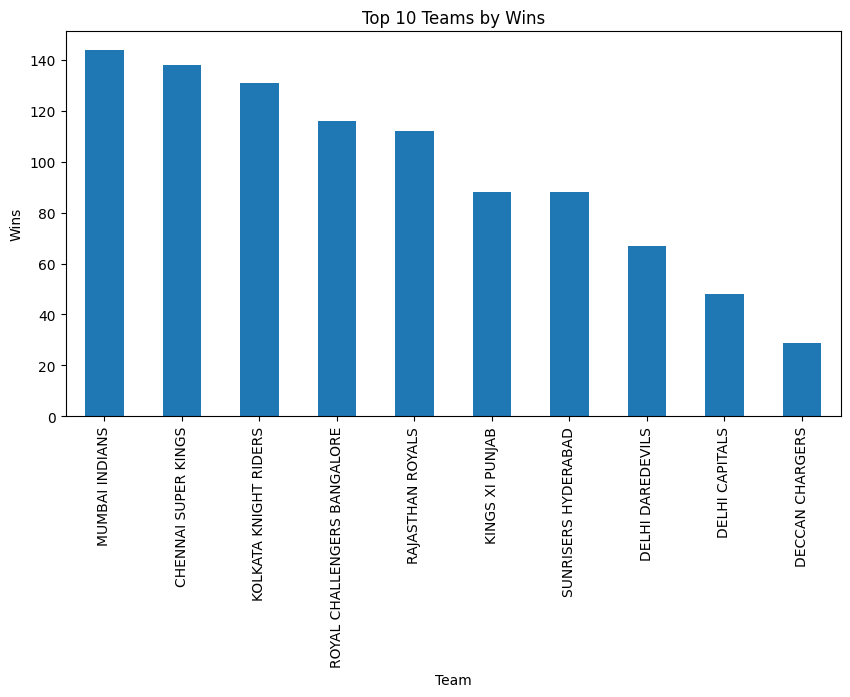

In [84]:
plt.figure(figsize=(10,5))
matches['winner'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Teams by Wins")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()


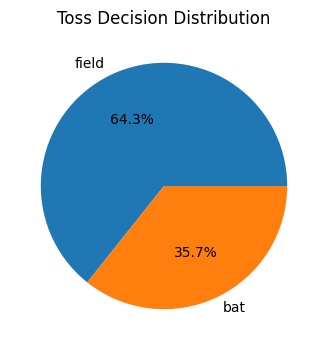

In [85]:
plt.figure(figsize=(6,4))
matches['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Toss Decision Distribution")
plt.ylabel("")
plt.show()


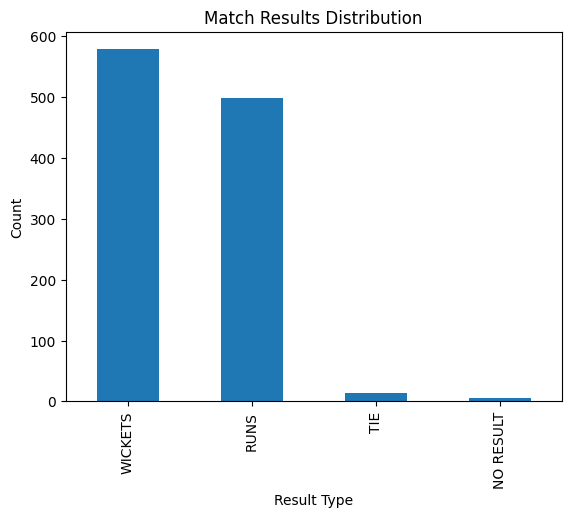

In [86]:
matches['result'].value_counts().plot(kind='bar')
plt.title("Match Results Distribution")
plt.xlabel("Result Type")
plt.ylabel("Count")
plt.show()


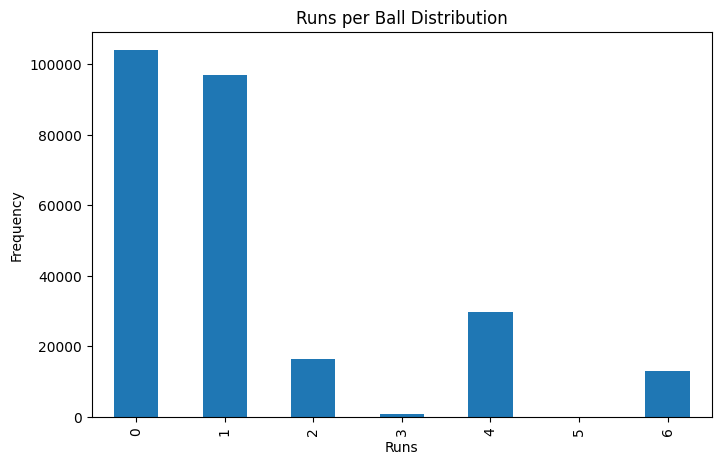

In [87]:
plt.figure(figsize=(8,5))
deliveries['batsman_runs'].value_counts().sort_index().plot(kind='bar')
plt.title("Runs per Ball Distribution")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()


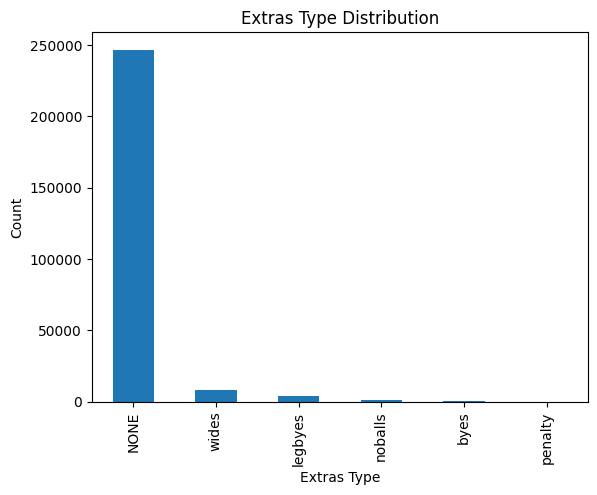

In [88]:
deliveries['extras_type'].value_counts().plot(kind='bar')
plt.title("Extras Type Distribution")
plt.xlabel("Extras Type")
plt.ylabel("Count")
plt.show()


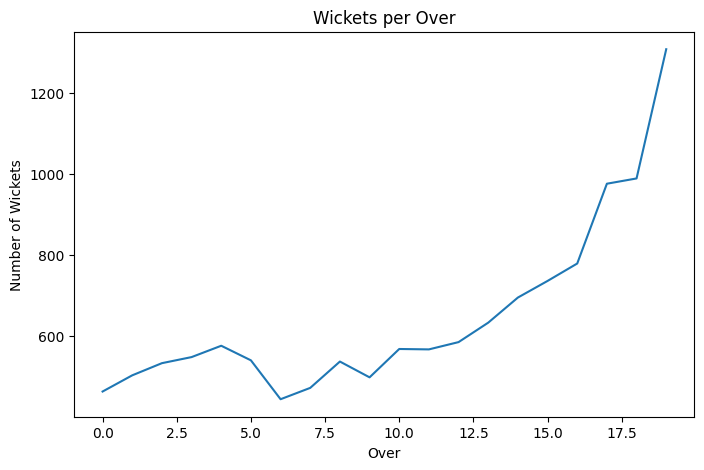

In [89]:
wickets_per_over = deliveries.groupby('over')['is_wicket'].sum()

plt.figure(figsize=(8,5))
wickets_per_over.plot()
plt.title("Wickets per Over")
plt.xlabel("Over")
plt.ylabel("Number of Wickets")
plt.show()


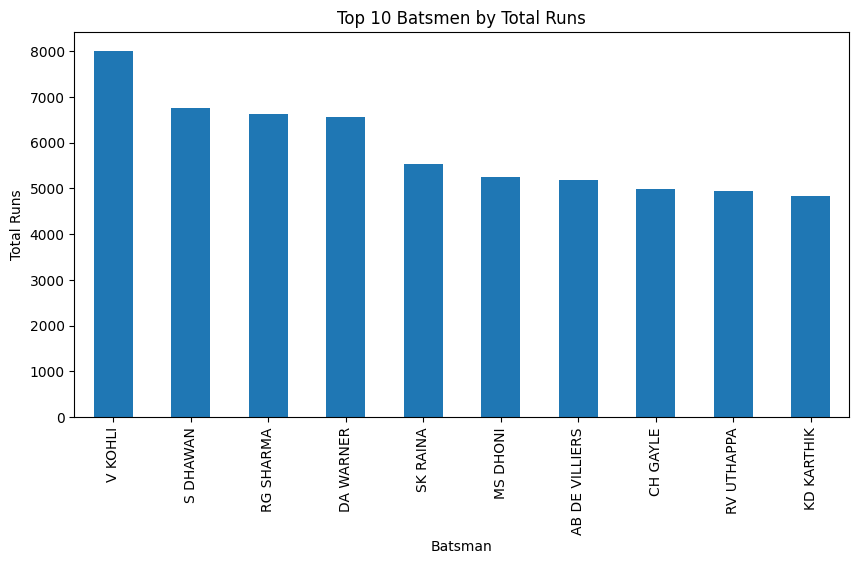

In [90]:
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_batsmen.plot(kind='bar')
plt.title("Top 10 Batsmen by Total Runs")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.show()


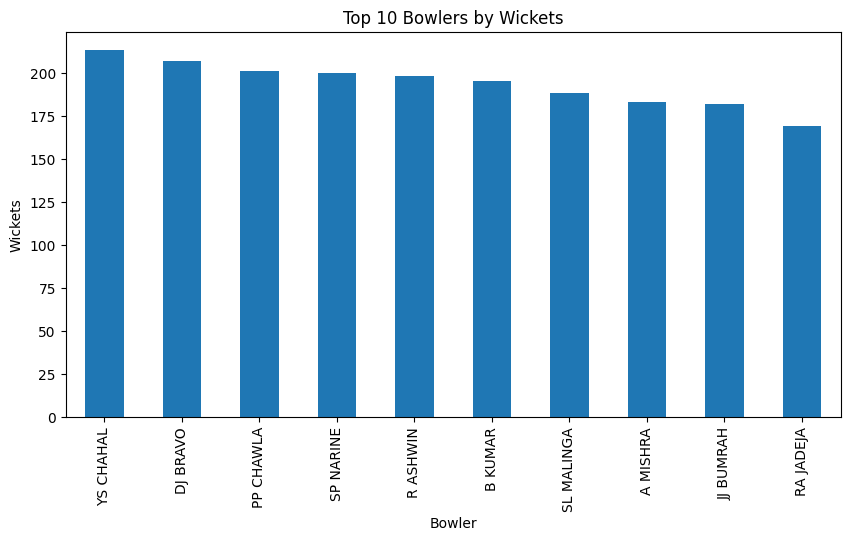

In [91]:
top_bowlers = deliveries[deliveries['is_wicket'] == 1]['bowler'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_bowlers.plot(kind='bar')
plt.title("Top 10 Bowlers by Wickets")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.show()
